## ワインの種類

このデータフレームには、ワインの化学的特徴を示す13個の特徴量と、それぞれのワインが属するクラス（0, 1, 2のいずれか）を示すターゲット列が含まれています。

1. **特徴量 (Features):**
   - Alcohol: アルコールの濃度
   - Malic acid: リンゴ酸の濃度
   - Ash: 灰の濃度
   - Alcalinity of ash: 灰のアルカリ度
   - Magnesium: マグネシウムの濃度
   - Total phenols: 総フェノールの濃度
   - Flavanoids: フラボノイドの濃度
   - Nonflavanoid phenols: ノンフラボノイドフェノールの濃度
   - Proanthocyanins: プロアントシアニジンの濃度
   - Color intensity: 色の濃度
   - Hue: 色相
   - OD280/OD315 of diluted wines: 希釈されたワインの光学的密度
   - Proline: プロリンの濃度

2. **ターゲット列 (Target):**
   - 0: クラス1に属するワイン
   - 1: クラス2に属するワイン
   - 2: クラス3に属するワイン


In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

df.to_csv('wine_data.csv')
# データフレームdfを表示する
df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 3. Classification(教師有り学習)

* 決定木(Decision Tree)について

決定木（Decision Tree）は、機械学習やデータマイニングで広く使用されるモデルの一つです。分類（Classification）および回帰（Regression）の両方の問題に適用することができます。

決定木は、データセットの特徴（Feature）に基づいてデータを分割することによって、目標変数（Target Variable）を予測するモデルを構築します。データを分割する際には、各分割点で目標変数に対する最も情報が豊富な特徴を選択します。このプロセスは再帰的に行われ、分割が不要となる条件が満たされるまで続きます。

決定木は直感的で理解しやすいモデルであり、以下のような特長があります。

* 解釈性が高い： 決定木は分岐や葉ノードが視覚的に理解しやすいため、モデルの解釈が比較的容易です。これにより、モデルがどのように予測を行っているかを理解しやすくなります。

* 非線形な関係をモデル化できる： 決定木は特徴の線形性に依存せず、非線形な関係をモデル化することができます。そのため、特徴間の複雑な相互作用を捉えるのに有効です。

* 前処理の要件が少ない： 決定木は特徴のスケーリングやダミー変数化などの前処理が必要ありません。カテゴリカルな特徴も扱うことができます。

* 過学習のリスクがある： 決定木は過学習しやすい傾向があります。過度に深い木を作成すると、訓練データに対する適合度が高くなりますが、未知のデータに対する汎化性能が低下する可能性があります。過学習を防ぐために、木の深さを制限するなどの手法が使われます。

* アンサンブル法との組み合わせが有効： 決定木は単体では性能が低いことがありますが、複数の決定木を組み合わせたアンサンブル法（例：ランダムフォレスト、勾配ブースティング木）を使うことで性能を向上させることができます。

### GPT プロンプト

* データフレームdfを利用、目的変数はtarget列を利用
* 決定木を使い分類を行う
* 交差検証法(k=5)を使い、精度の検証を行う
* 混同行列を用いて結果を確かめる、
* 正解率、適合率、再現率、F1スコアを表示する
* 混同行列はヒートマップで表示する
* 決定木を可視化する
* pythonコード

Cross-Validation Accuracies: [0.88888889 0.80555556 0.86111111 0.91428571 0.82857143]
Confusion Matrix:
[[57  2  0]
 [ 7 60  4]
 [ 0 10 38]]
Accuracy: 0.8707865168539326
Precision: 0.8715849050294275
Recall: 0.8707865168539326
F1 Score: 0.8696442682192203


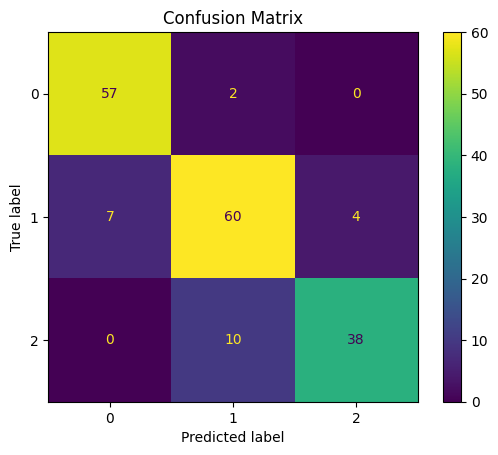

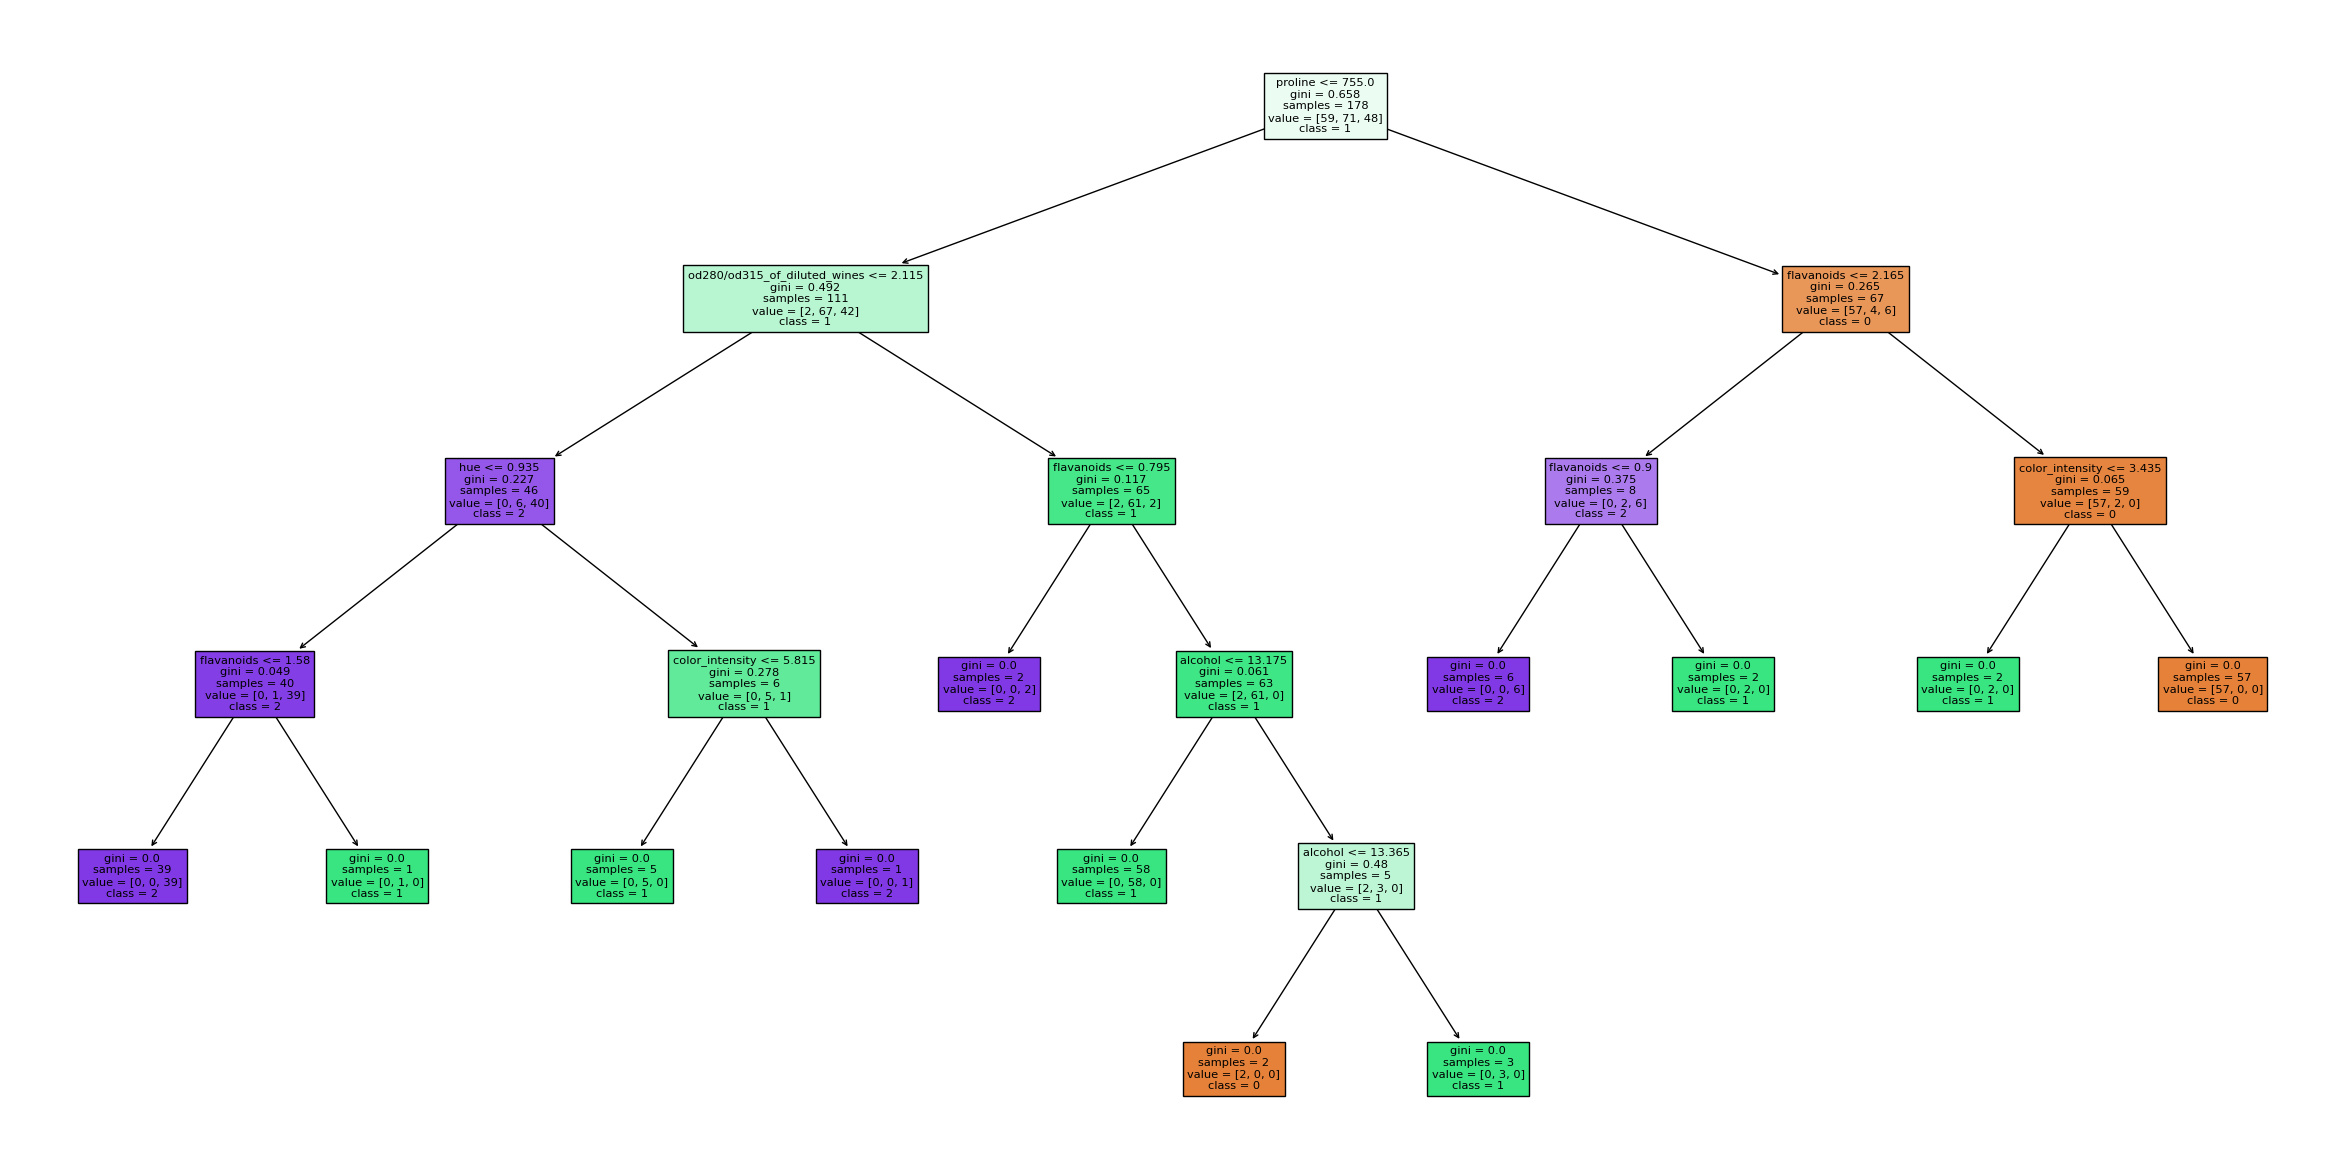

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

# データフレームから特徴量（説明変数）Xと目的変数（ターゲット）yを取得
X = df.drop('target', axis=1)  # 目的変数以外の列を特徴量として使用
y = df['target']  # 目的変数

# 決定木モデルの定義
tree_classifier = DecisionTreeClassifier()

# 交差検証法を使用してモデルの精度を評価
# cross_val_score関数を使用してk=5の交差検証を行い、精度を評価
accuracies = cross_val_score(tree_classifier, X, y, cv=5)

# 交差検証法の精度を出力
print("Cross-Validation Accuracies:", accuracies)

# 交差検証法を使用して予測を行う
predicted = cross_val_predict(tree_classifier, X, y, cv=5)

# 混同行列を作成して結果を確認
conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

# 正解率を計算して表示
accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

# 適合率を計算して表示
precision = precision_score(y, predicted, average='weighted')
print("Precision:", precision)

# 再現率を計算して表示
recall = recall_score(y, predicted, average='weighted')
print("Recall:", recall)

# F1スコアを計算して表示
f1 = f1_score(y, predicted, average='weighted')
print("F1 Score:", f1)

# 混同行列をヒートマップで表示
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1', '2'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# 決定木モデルを適合
tree_classifier.fit(X, y)

# 決定木を可視化
plt.figure(figsize=(30, 15))
tree.plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['0', '1', '2'])
plt.show()

## 主成分分析を用いた精度向上

### GPT プロンプト : 主成分分析を利用した決定木の精度向上

* dfを利用
* PCAではtargetは利用しない
* PCAによって得られた射影行列を使用して、元のデータを主成分空間に射影する(累積寄与率が80％)
* 射影されたデータに対して決定木を実行(交差検証法利用, k=5)
* クラスタリング結果を'dt_pca'列に登録
* クラスタリング結果をPC1とPC2を使い散布図で表示(Target値で色分け、クラスタで形を変える)
* targetとクラスタリング結果を比較(targetとクラスタの表を作成)
* クラスタリング結果を元のデータフレームに追加し、CSVファイルとして保存(ファイル名：dt_pca_df.csv)
* 混同行列を用いて結果を確かめる、
* 正解率、適合率、再現率、F1スコアを表示する
* 混同行列はヒートマップで表示する

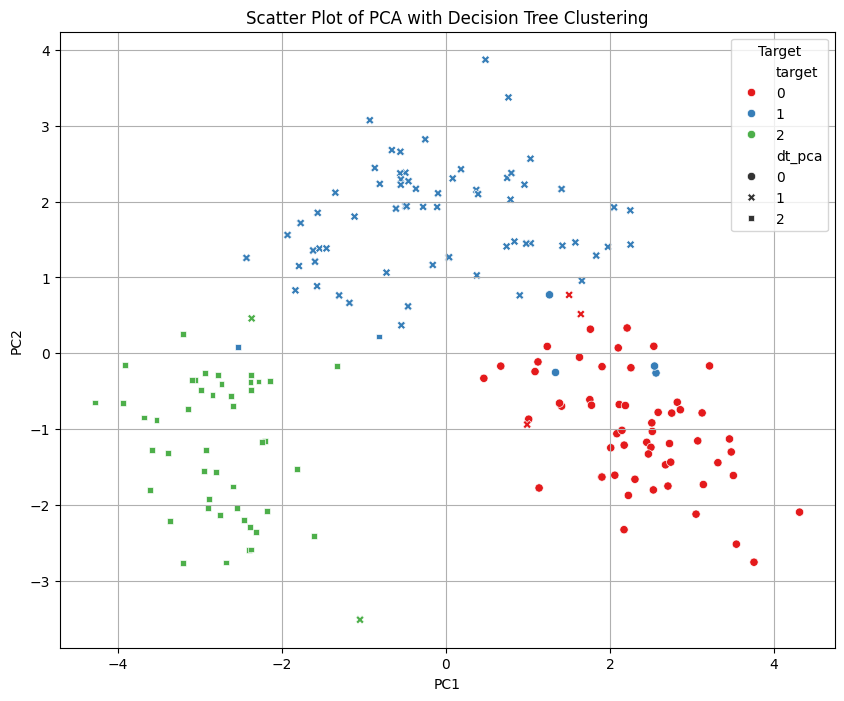

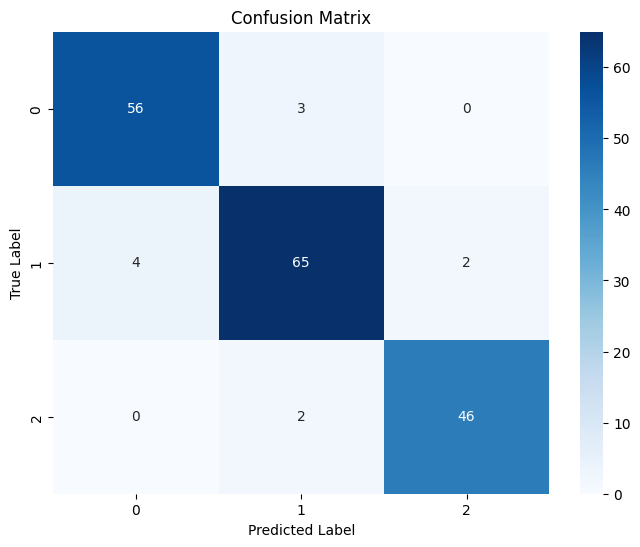

Accuracy: 0.9382022471910112
Precision: 0.938175494917068
Recall: 0.9382022471910112
F1 Score: 0.9381483408567827


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))

# PCAを実行
pca = PCA(n_components=0.8)  # 累積寄与率80%でPCAを実行
X_pca = pca.fit_transform(X_scaled)  # PCAによる射影

# 決定木を実行
dt_classifier = DecisionTreeClassifier()
y_pred = cross_val_predict(dt_classifier, X_pca, df['target'], cv=5)  # 交差検証法による予測

# クラスタリング結果をデータフレームに追加
df['dt_pca'] = y_pred

# クラスタリング結果の可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], style=df['dt_pca'], palette='Set1')
plt.title('Scatter Plot of PCA with Decision Tree Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Target')
plt.grid()
plt.show()

# 混同行列を作成
conf_matrix = confusion_matrix(df['target'], df['dt_pca'])

# 混同行列を表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 正解率
accuracy = accuracy_score(df['target'], df['dt_pca'])
print("Accuracy:", accuracy)

# 適合率
precision = precision_score(df['target'], df['dt_pca'], average='weighted')
print("Precision:", precision)

# 再現率
recall = recall_score(df['target'], df['dt_pca'], average='weighted')
print("Recall:", recall)

# F1スコア
f1 = f1_score(df['target'], df['dt_pca'], average='weighted')
print("F1 Score:", f1)

# クラスタリング結果を元のデータフレームに追加して保存
df.to_csv('dt_pca_df.csv', index=False)
